In [1]:
%cd ..

/Users/maimai/Desktop/project/May


In [2]:
import builtins
builtins.uclresearch_topic = 'GIVENCHY'
# builtins.uclresearch_topic = 'HAWKING'
# builtins.uclresearch_topic = 'NYC'
# builtins.uclresearch_topic = 'FLORIDA'
from configuration import config
from configuration import dzcnapy_plotlib as dzcnapy


from tqdm import tqdm
import os
import pickle
import math
import numpy as np
import networkx as nx
import pandas as pd
from collections import Counter
import operator

# Plotting
import matplotlib
# # matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Networkx
from networkx.drawing.nx_agraph import graphviz_layout



('Reading config file from location: '
 '/Users/maimai/Desktop/project/May/configuration/env.properties')
{'calculate': {'analysis': True,
               'network': True,
               'uniquetweets': True,
               'uniqueusers': True},
 'data': {'dates': ['2018-03-11', '2018-03-12', '2018-03-13'],
          'eventname': "Givenchy's Death",
          'phrases': ['givenchy%20death', 'givenchy%20passed%20away'],
          'starttime': 'Mar 12 08:20:00 -0500 2018'},
 'path': {'crawl': {'followers': '/Users/maimai/Desktop/project/May/followers',
                    'friends': '/Users/maimai/Desktop/project/May/friends'},
          'cwd': '/Users/maimai/Desktop/project/May/data/givenchy',
          'ml': '/Users/maimai/Desktop/project/May/data/givenchy/pickle',
          'networkx': {'all': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_all.dat',
                       'friends': '/Users/maimai/Desktop/project/May/data/givenchy/pickle/networkx_friends.dat',
       

In [3]:
n_bytes = 2**31
max_bytes = 2**31 - 1

path = "/Users/maimai/Desktop/project/May/data/givenchy/pickle_old"  

def write_to_pickle(file_path, data):

    bytes_out = pickle.dumps(data)
    with open(file_path, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

def load_pickle(file_path):
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    return pickle.loads(bytes_in)



In [4]:

project_name = config.settings['data']['eventname']
timeframe = config.settings['timeframe']
save_to_file = config.settings['save_to_file'] == 'True'
window = 30
# unique_users = config.load_users_dataframe()
# users = load_pickle(path+'/users.dat')
# network_friends = config.load_networkx_friends()
# network_potential = config.load_networkx_potential()
unique_users = load_pickle(path+'/Givenchy_network_simulation.pkl')
unique_users

,t_current,user_id,source_candidates,infec_candidates,followers_count,friends_count,source_id,seed_user_id,SIR,generations,time_lapsed,time_since_seed
0,NaN,100766356,"[3, 5, 6, 7, 10, 11, 14, 15, 19, 20, 24, 74, 8...","[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",143119,4643,100766356,100766356,1,0,0,0
1,NaN,3186545203,[0],"[14, 4334]",753,3428,100766356,100766356,1,1,1,NaN
2,NaN,4134992843,"[0, 12, 21, 32, 48, 748, 819, 972, 2358, 2778,...","[12, 32, 818, 1635, 2358, 4699]",2161,396,100766356,100766356,1,1,2,NaN
3,NaN,1955472014,"[0, 115, 577]","[0, 3587]",242,642,100766356,100766356,1,1,2,NaN
4,NaN,406301175,[],[],116,239,406301175,406301175,1,0,1.13,0
5,NaN,2938214163,"[0, 20, 577, 1012, 1591, 1656, 1807, 1953, 320...","[0, 20, 306, 1591, 1953, 3203, 3810]",250,493,100766356,100766356,1,1,2,NaN
6,NaN,89805327,"[0, 21, 748, 1912, 1929]","[0, 20, 1656, 1912, 2504, 2811, 4768, 4930]",39697,1924,100766356,100766356,1,1,1,NaN
7,NaN,342931336,[0],"[0, 306]",672,353,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,27220084,[0],[],275,440,100766356,100766356,1,1,1,NaN
9,NaN,97360017,[0],[],1911,506,100766356,100766356,1,1,1,NaN


In [5]:
# unique_users = load_pickle(path+'/Stanford_network_simulation_a.pkl')
users= load_pickle(path+'/users.dat')
users

,user,user_id,time_lapsed,followers_count,friends_count,user_created_days,user_statuses_count,user_listed_count,user_favourites_count,normalized_user_statuses_count,normalized_user_followers_count,normalized_user_favourites_count,normalized_user_listed_count,normalized_user_friends_count,mention_and_reply,source_candidates,source_index,seed_index,generation,time_since_seed
0,davelackie,100766356,0.00,143119,4643,2993,181393,555,11938,60.605747,47.817908,3.988640,0.185433,1.551286,[],"[3, 5, 6, 7, 10, 11, 14, 15, 19, 20, 24, 74, 8...",None,0,0,0
1,alexanderskhan,3186545203,0.15,753,3428,1042,12853,8,34186,12.334933,0.722649,32.808061,0.007678,3.289827,[0],[0],0,0,1,0.15
2,consiglierela,4134992843,0.23,2161,396,856,46934,36,78797,54.829439,2.524533,92.052570,0.042056,0.462617,[0],"[0, 12, 21, 32, 48, 748, 819, 972, 2358, 2778,...",0,0,1,0.23
3,ImpactPrincess,1955472014,0.63,242,642,1613,23179,55,28995,14.370118,0.150031,17.975821,0.034098,0.398016,[0],"[0, 115, 577]",0,0,1,0.63
4,Damek0Masca,406301175,1.13,116,239,2318,2407,12,1058,1.038395,0.050043,0.456428,0.005177,0.103106,[],[],None,4,0,0
5,panagiota_karag,2938214163,1.18,250,493,1176,18995,20,13390,16.152211,0.212585,11.386054,0.017007,0.419218,[0],"[0, 20, 577, 1012, 1591, 1656, 1807, 1953, 320...",0,0,1,1.18
6,Gwen_UsBeauty,89805327,1.32,39697,1924,3041,34644,528,20885,11.392305,13.053930,6.867807,0.173627,0.632687,[0],"[0, 21, 748, 1912, 1929]",0,0,1,1.32
7,mascott04,342931336,1.83,672,353,2421,15651,1,54298,6.464684,0.277571,22.427922,0.000413,0.145808,[0],[0],0,0,1,1.83
8,FazeyPie,27220084,2.15,275,440,3272,25944,21,13821,7.929095,0.084046,4.224022,0.006418,0.134474,[0],[0],0,0,1,2.15
9,RissaRunsThis,97360017,2.42,1911,506,3008,175675,80,3810,58.402593,0.635306,1.266622,0.026596,0.168218,[0],[0],0,0,1,2.42


In [6]:
unique_users['user']=users['user']
unique_users['source_index'] = None

# d=0
for i in range(len(unique_users)):
    source_id = unique_users.loc[i,'source_id']
    source_index = unique_users[unique_users.user_id.isin([source_id])].index.values
#     print(source_index)
    if len(source_index) != False:
        unique_users.loc[i,'source_index']=int(source_index)
        unique_users.loc[i,'time_since_seed']=unique_users.loc[i,'time_lapsed']-unique_users.loc[int(source_index),'time_lapsed']
#         d=d+1
#         print(d)
# unique_users

[0]
[0]
[0]
[0]
[4]
[0]
[0]
[]
[0]
[0]
[0]
[]
[0]
[]
[0]
[0]
[0]
[0]
[]
[0]
[0]
[21]
[0]
[]
[0]
[25]
[21]
[]
[21]
[21]
[0]
[21]
[0]
[21]
[34]
[35]
[0]
[21]
[21]
[39]
[21]
[41]
[42]
[43]
[44]
[45]
[0]
[47]
[921]
[]
[48]
[21]
[21]
[21]
[]
[48]
[21]
[48]
[21]
[48]
[]
[48]
[21]
[21]
[2005]
[]
[48]
[48]
[48]
[48]
[]
[48]
[48]
[48]
[0]
[48]
[21]
[48]
[48]
[48]
[48]
[81]
[48]
[48]
[21]
[48]
[48]
[48]
[48]
[]
[21]
[]
[]
[48]
[48]
[48]
[48]
[48]
[]
[21]
[48]
[48]
[48]
[48]
[48]
[0]
[48]
[48]
[]
[48]
[48]
[48]
[48]
[21]
[]
[21]
[21]
[21]
[]
[21]
[]
[48]
[48]
[48]
[48]
[48]
[]
[]
[21]
[48]
[48]
[2358]
[48]
[]
[48]
[]
[21]
[21]
[48]
[48]
[48]
[2005]
[21]
[48]
[48]
[48]
[48]
[48]
[48]
[21]
[21]
[21]
[48]
[48]
[48]
[48]
[48]
[48]
[48]
[21]
[48]
[48]
[21]
[48]
[21]
[21]
[48]
[21]
[]
[819]
[]
[48]
[21]
[48]
[48]
[48]
[]
[48]
[48]
[21]
[48]
[48]
[48]
[]
[21]
[48]
[48]
[48]
[48]
[21]
[48]
[48]
[21]
[141]
[48]
[0]
[48]
[48]
[48]
[48]
[48]
[]
[48]
[48]
[21]
[48]
[]
[21]
[]
[48]
[48]
[48]
[48]
[21]
[21]
[]

[]
[]
[]
[21]
[]
[]
[21]
[48]
[]
[48]
[48]
[]
[193]
[]
[]
[]
[48]
[48]
[2423]
[1759]
[]
[48]
[]
[48]
[]
[48]
[48]
[48]
[]
[]
[]
[]
[]
[2438]
[2005]
[48]
[]
[]
[]
[21]
[]
[]
[48]
[]
[48]
[48]
[48]
[]
[]
[48]
[]
[48]
[]
[]
[]
[]
[]
[48]
[48]
[]
[]
[48]
[0]
[]
[21]
[]
[]
[48]
[]
[]
[48]
[48]
[]
[819]
[]
[]
[]
[]
[48]
[21]
[21]
[48]
[]
[888]
[103]
[48]
[115]
[48]
[]
[48]
[48]
[48]
[]
[]
[]
[]
[48]
[]
[]
[0]
[]
[2358]
[]
[819]
[]
[21]
[]
[]
[]
[]
[2515]
[48]
[48]
[21]
[]
[48]
[819]
[]
[]
[]
[]
[48]
[]
[]
[]
[]
[1759]
[507]
[48]
[21]
[48]
[2358]
[]
[]
[1992]
[]
[568]
[]
[48]
[]
[21]
[]
[]
[48]
[]
[]
[]
[]
[]
[748]
[]
[21]
[]
[]
[2358]
[48]
[]
[21]
[]
[]
[48]
[]
[507]
[]
[]
[48]
[]
[48]
[748]
[48]
[0]
[48]
[]
[]
[]
[]
[21]
[48]
[]
[]
[21]
[]
[888]
[]
[48]
[]
[]
[]
[]
[]
[888]
[]
[]
[48]
[]
[]
[48]
[499]
[]
[]
[]
[]
[]
[]
[48]
[]
[]
[]
[]
[21]
[]
[]
[48]
[]
[]
[]
[]
[]
[48]
[]
[]
[]
[32]
[]
[48]
[]
[48]
[]
[2633]
[]
[]
[21]
[748]
[48]
[]
[48]
[]
[]
[48]
[]
[]
[]
[3049]
[]
[48]
[48]
[]
[2167]
[

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[4958]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[888]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[21]
[]
[]
[]
[]
[]
[]
[21]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [7]:
# deleted_line = list(unique_users[unique_users.generations.isnull().values==True].index.values)
# all_line = list(unique_users.index.values)
# all_line.removeAll(deleted_line)
# all_line
a=[0,1,2,3,4,5]
unique_users=unique_users[unique_users.generations.isin(a)]
unique_users
# unique_users.index[14]

,t_current,user_id,source_candidates,infec_candidates,followers_count,friends_count,source_id,seed_user_id,SIR,generations,time_lapsed,time_since_seed,user,source_index
0,NaN,100766356,"[3, 5, 6, 7, 10, 11, 14, 15, 19, 20, 24, 74, 8...","[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",143119,4643,100766356,100766356,1,0,0,0,davelackie,0
1,NaN,3186545203,[0],"[14, 4334]",753,3428,100766356,100766356,1,1,1,1,alexanderskhan,0
2,NaN,4134992843,"[0, 12, 21, 32, 48, 748, 819, 972, 2358, 2778,...","[12, 32, 818, 1635, 2358, 4699]",2161,396,100766356,100766356,1,1,2,2,consiglierela,0
3,NaN,1955472014,"[0, 115, 577]","[0, 3587]",242,642,100766356,100766356,1,1,2,2,ImpactPrincess,0
4,NaN,406301175,[],[],116,239,406301175,406301175,1,0,1.13,0,Damek0Masca,4
5,NaN,2938214163,"[0, 20, 577, 1012, 1591, 1656, 1807, 1953, 320...","[0, 20, 306, 1591, 1953, 3203, 3810]",250,493,100766356,100766356,1,1,2,2,panagiota_karag,0
6,NaN,89805327,"[0, 21, 748, 1912, 1929]","[0, 20, 1656, 1912, 2504, 2811, 4768, 4930]",39697,1924,100766356,100766356,1,1,1,1,Gwen_UsBeauty,0
8,NaN,27220084,[0],[],275,440,100766356,100766356,1,1,1,1,FazeyPie,0
9,NaN,97360017,[0],[],1911,506,100766356,100766356,1,1,1,1,RissaRunsThis,0
10,NaN,357198527,[0],[0],933,515,100766356,100766356,1,1,1,1,claireangel2,0


In [8]:
network_all = nx.DiGraph()
for i in tqdm(range(len(unique_users))):
    index = unique_users.index[i]
    network_all.add_node(index,
                         user = unique_users.loc[index, 'user'],
                         user_id = unique_users.loc[index, 'user_id'],
                         time_lapsed = unique_users.loc[index, 'time_lapsed'],
                         followers_count = unique_users.loc[index, 'followers_count'],
                         friends_count = unique_users.loc[index, 'friends_count'],
                         generation = unique_users.loc[index, 'generations'],
                         time_since_seed = unique_users.loc[index, 'time_since_seed'],
                        )
    source_index = unique_users.loc[index, 'source_index']
#     print(source_index)
    network_all.add_edge(source_index, index)
len(network_all)

100%|██████████| 2061/2061 [00:00<00:00, 5939.14it/s]


2061

In [9]:
# unique_users

In [10]:
def get_colors(depth):
    return sns.cubehelix_palette(depth, start=3, rot=1, reverse=True)
    sns.palplot(colors)
    
def plot_network(graph, title):
    plt.axis('off')
    pos = graphviz_layout(graph)
    nx.draw_networkx(graph, pos=pos, with_labels=False, **dzcnapy.small_attrs)
    depth = max(nx.get_node_attributes(graph,'generation').values()) + 1
    colors = get_colors(depth)
    color = [colors[graph.node[n]["generation"]] for n in graph]
    dzcnapy.small_attrs["node_color"] = color
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.set_extent(pos, plt)
    dzcnapy.plot(title, [15, 15], save=True)

In [11]:
# plot_network(network_all, "Simulation result of the Givenchy's Death")

   0  1  2  3  4
0  0  0  0  0  0
1  0  0  0  0  0
2  0  0  0  0  0
3  0  0  0  0  0
4  0  0  0  0  0


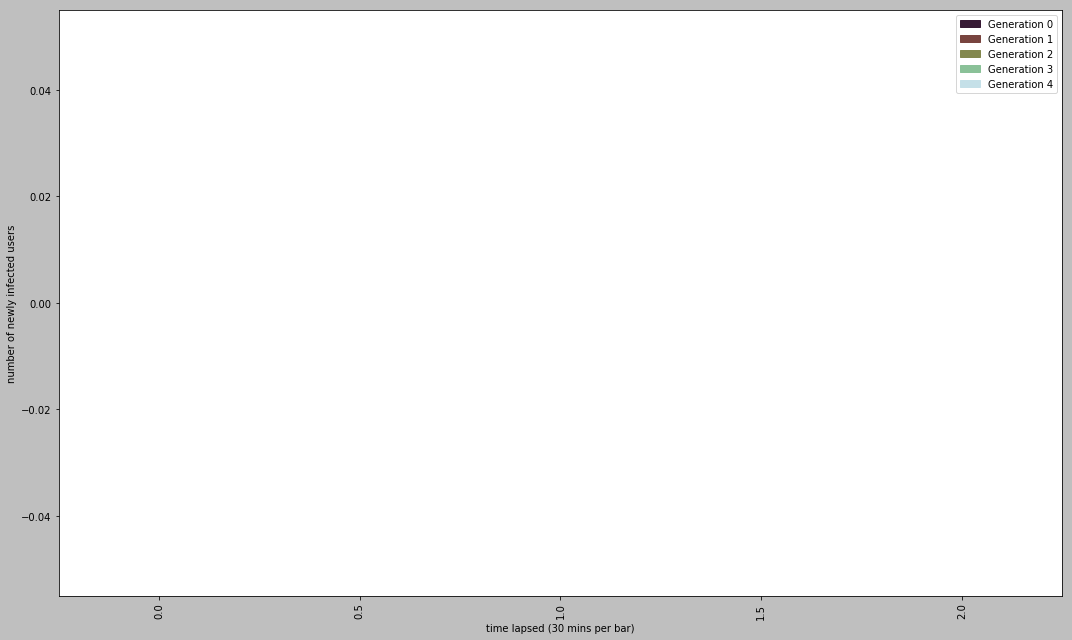

In [21]:
title = "time lapsed vs newly infected users for Givenchy's death"
depth = max(nx.get_node_attributes(network_all,'generation').values()) + 1
d = pd.DataFrame(0, index=np.arange(5), columns=range(depth))
print(d)
for i in range(0,5):
    data = unique_users[(unique_users.time_lapsed >= i) & (unique_users.time_lapsed < i)]
    for generation in range(depth):
        d.iloc[i, generation] = sum(data.generations == generation)
colors = get_colors(depth)
ax = d.plot.bar(
    stacked=True, 
    color = colors
);
ax.set_xticks(range(5))
ax.set_xticklabels([i*0.5 for i in range(48)])
ax.set_xlabel('time lapsed (30 mins per bar)')
ax.set_ylabel('number of newly infected users')
patchList = []
for index in range(depth):
    data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
    patchList.append(data_key)
plt.legend(handles=patchList)
dzcnapy.plot(title, [15, 9], save=True)


In [63]:
unique_users[unique_users.generations.isin([1])]

,t_current,user_id,source_candidates,infec_candidates,followers_count,friends_count,source_id,seed_user_id,SIR,generations,time_lapsed,time_since_seed,user,source_index
1,NaN,3186545203,[0],"[14, 4334]",753,3428,100766356,100766356,1,1,1,1,alexanderskhan,0
2,NaN,4134992843,"[0, 12, 21, 32, 48, 748, 819, 972, 2358, 2778,...","[12, 32, 818, 1635, 2358, 4699]",2161,396,100766356,100766356,1,1,2,2,consiglierela,0
3,NaN,1955472014,"[0, 115, 577]","[0, 3587]",242,642,100766356,100766356,1,1,2,2,ImpactPrincess,0
5,NaN,2938214163,"[0, 20, 577, 1012, 1591, 1656, 1807, 1953, 320...","[0, 20, 306, 1591, 1953, 3203, 3810]",250,493,100766356,100766356,1,1,2,2,panagiota_karag,0
6,NaN,89805327,"[0, 21, 748, 1912, 1929]","[0, 20, 1656, 1912, 2504, 2811, 4768, 4930]",39697,1924,100766356,100766356,1,1,1,1,Gwen_UsBeauty,0
8,NaN,27220084,[0],[],275,440,100766356,100766356,1,1,1,1,FazeyPie,0
9,NaN,97360017,[0],[],1911,506,100766356,100766356,1,1,1,1,RissaRunsThis,0
10,NaN,357198527,[0],[0],933,515,100766356,100766356,1,1,1,1,claireangel2,0
12,NaN,324873471,"[0, 2, 32, 1347]","[2, 32, 1347, 2707, 4223, 4481]",5246,596,100766356,100766356,1,1,1,1,ShinyStew,0
14,NaN,17431232,"[0, 1, 16, 306, 577, 845, 879, 1012, 1084, 159...","[0, 16, 20, 306, 577, 1012, 1084, 1591, 1656, ...",1718,1738,100766356,100766356,1,1,1,1,robinson4206,0


In [103]:
unique_users.generations.unique()

array([0, 1, 2, 3, 4], dtype=object)

109

In [105]:
unique_users[unique_users.generations.isin([0])].time_lapsed.unique()

array([0.0, 1.13, 17.0, 18.68, 22.82, 23.27, 24.93, 24.95, 24.98, 25.58,
       28.13, 41.32, 42.7, 45.6, 47.12, 52.62, 54.2, 54.53, 57.95, 58.45,
       62.63, 79.57, 83.35, 83.65, 86.1, 90.47, 91.18, 93.5, 96.17, 100.47,
       107.67, 114.33, 116.48, 117.98, 119.77, 123.03, 129.3, 131.72,
       140.83, 145.2, 146.95, 149.22, 149.28, 151.03, 157.47, 158.5, 159.6,
       164.32, 169.77, 170.18, 171.73, 174.25, 177.52, 185.2, 185.8, 186.2,
       187.55, 189.12, 189.32, 195.45, 203.15, 204.43, 209.4, 210.03,
       219.6, 230.27, 256.43, 270.35, 272.07, 329.27, 339.4, 344.55,
       360.22, 366.42, 389.93, 427.85, 439.17, 453.47, 503.72, 516.63,
       516.97, 592.67, 639.22, 641.32, 703.13, 720.88, 852.97, 873.38,
       894.02, 912.15, 930.8, 944.13, 973.87, 1036.13, 1108.97, 1342.4], dtype=object)

In [106]:
unique_users[unique_users.generations.isin([1])].time_lapsed.unique()

array([1, 2, 19, 94, 18, 20, 48, 17, 91, 29, 21, 95, 92], dtype=object)

In [107]:
unique_users[unique_users.generations.isin([2])].time_lapsed.unique()

array([18, 20, 19, 17, 91, 29, 94, 92], dtype=object)

In [108]:
unique_users[unique_users.generations.isin([3])].time_lapsed.unique()

array([19, 91, 20, 92, 21, 94, 22], dtype=object)

In [109]:
unique_users[unique_users.generations.isin([4])].time_lapsed.unique()

array([20, 91, 21, 92, 29], dtype=object)

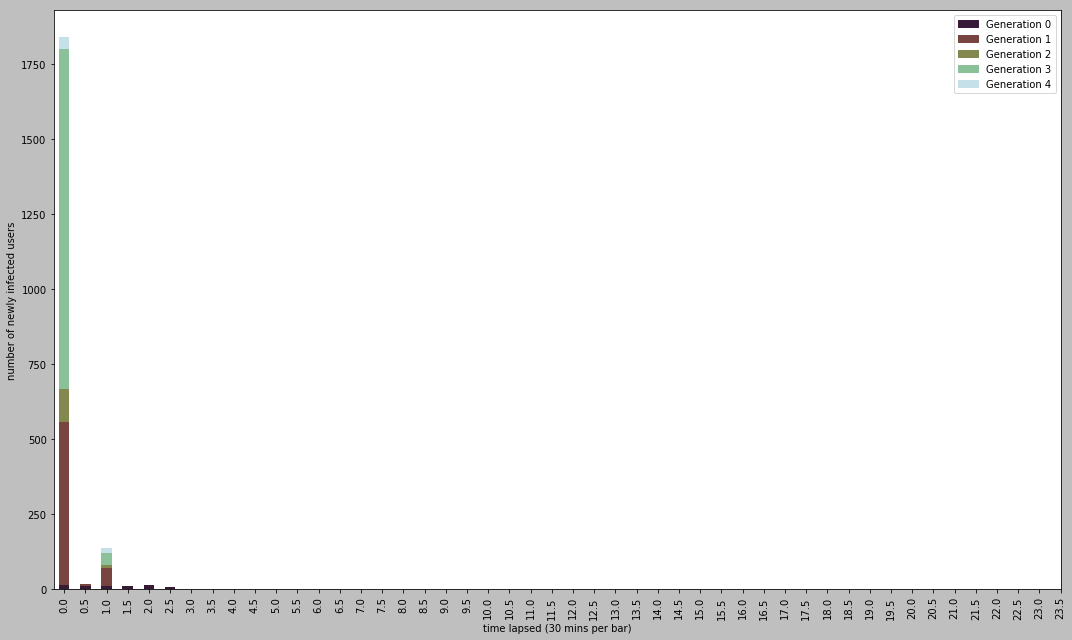

In [112]:
timeframe=1342
window=30
depth=5
def plot_time_lapsed_vs_newly_infected_users():
    title = 'time lapsed vs newly infected users for event {}'.format(project_name)
    d = pd.DataFrame(0, index=np.arange(int(timeframe)/window), columns=range(depth))
    for i in range(int(int(timeframe)/window)):
        data = unique_users[(unique_users.time_lapsed >= (i)*window) & (unique_users.time_lapsed < (i+1)*window)]
        for generation in range(depth):
            d.iloc[i, generation] = sum(data.generations == generation)
    colors = get_colors(depth)
    ax = d.plot.bar(
        stacked=True, 
        color = colors
    );
    ax.set_xticks(range(48))
    ax.set_xticklabels([i*0.5 for i in range(48)])
    ax.set_xlabel('time lapsed (30 mins per bar)')
    ax.set_ylabel('number of newly infected users')
    patchList = []
    for index in range(depth):
        data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
        patchList.append(data_key)
    plt.legend(handles=patchList)
    dzcnapy.plot(title, [15, 9], save=True)
plot_time_lapsed_vs_newly_infected_users()

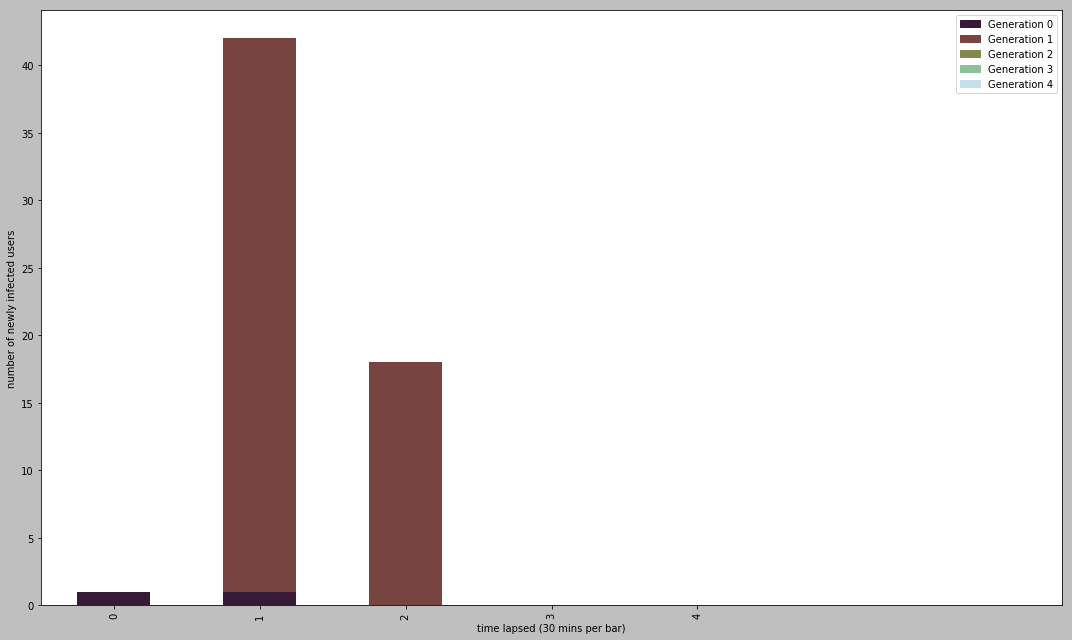

In [49]:
title = 'time lapsed vs newly infected users for event {}'.format(project_name)
depth=5
d = pd.DataFrame(0, index=np.arange(7), columns=range(depth))
# print(d)
for i in range(7):
    data = unique_users[(unique_users.time_lapsed >= i) & (unique_users.time_lapsed < (i+1))]
#     print(data)
    for generations in range(depth):
        d.iloc[i, generations] = sum(data.generations == generations)
#         print(d)
colors = get_colors(depth)
ax = d.plot.bar(
    stacked=True, 
    color = colors
);
ax.set_xticks(range(5))
ax.set_xticklabels([i for i in range(5)])
ax.set_xlabel('time lapsed (30 mins per bar)')
ax.set_ylabel('number of newly infected users')
patchList = []
for index in range(depth):
    data_key = mpatches.Patch(color=colors[index], label='Generation {}'.format(index))
    patchList.append(data_key)
plt.legend(handles=patchList)
dzcnapy.plot(title, [15, 9], save=True)

